In [1]:
pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/wfp-food-prices-database/wfp_food_prices_database.csv


In [4]:
import pandas as pd

df = pd.read_csv("/kaggle/input/wfp-food-prices-database/wfp_food_prices_database.csv", low_memory=False)

df.head()


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

df = pd.read_csv("/kaggle/input/wfp-food-prices-database/wfp_food_prices_database.csv", low_memory=False)

df.head()






/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


In [6]:
print(df.columns.tolist())


['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name', 'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id', 'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource']


In [7]:
import pandas as pd

df = pd.read_csv('/kaggle/input/wfp-food-prices-database/wfp_food_prices_database.csv', low_memory=False)

# Show all actual column names
print(df.columns.tolist())


['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name', 'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id', 'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource']


In [8]:
import pandas as pd

# Load data
df = pd.read_csv('/kaggle/input/wfp-food-prices-database/wfp_food_prices_database.csv', low_memory=False)

# Select relevant columns
df = df[['adm0_name', 'mkt_name', 'cm_name', 'mp_price', 'cur_name', 'um_name', 'mp_month', 'mp_year']]

# Rename columns for clarity
df.columns = ['country', 'market', 'commodity', 'price', 'currency', 'unit', 'month', 'year']



In [9]:
# Remove rows with missing prices or markets
df = df.dropna(subset=['price', 'market', 'commodity'])

# Convert year and month to datetime
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')


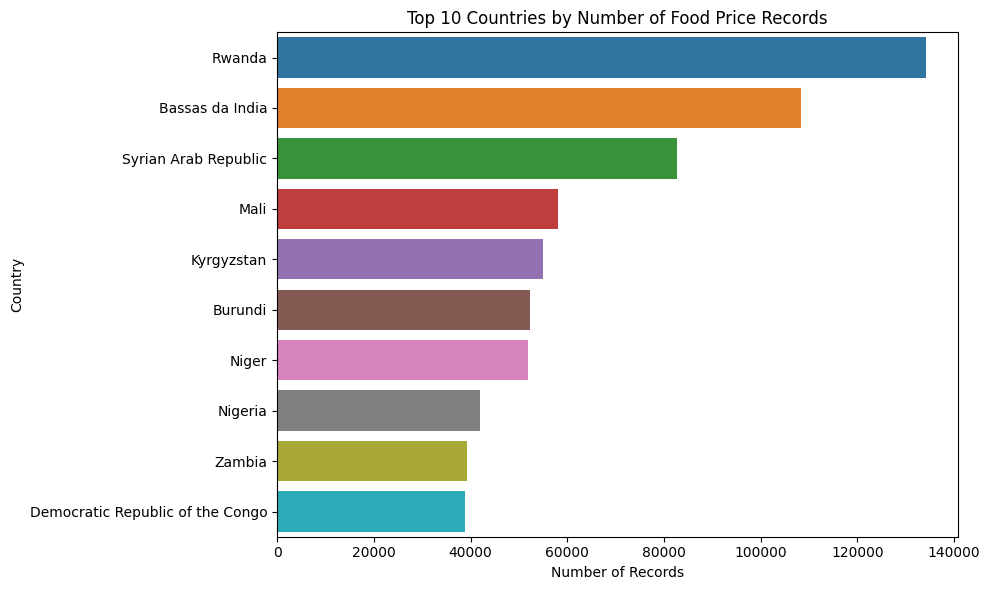

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(data=df, y='country', order=df['country'].value_counts().head(10).index)
plt.title('Top 10 Countries by Number of Food Price Records')
plt.xlabel('Number of Records')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


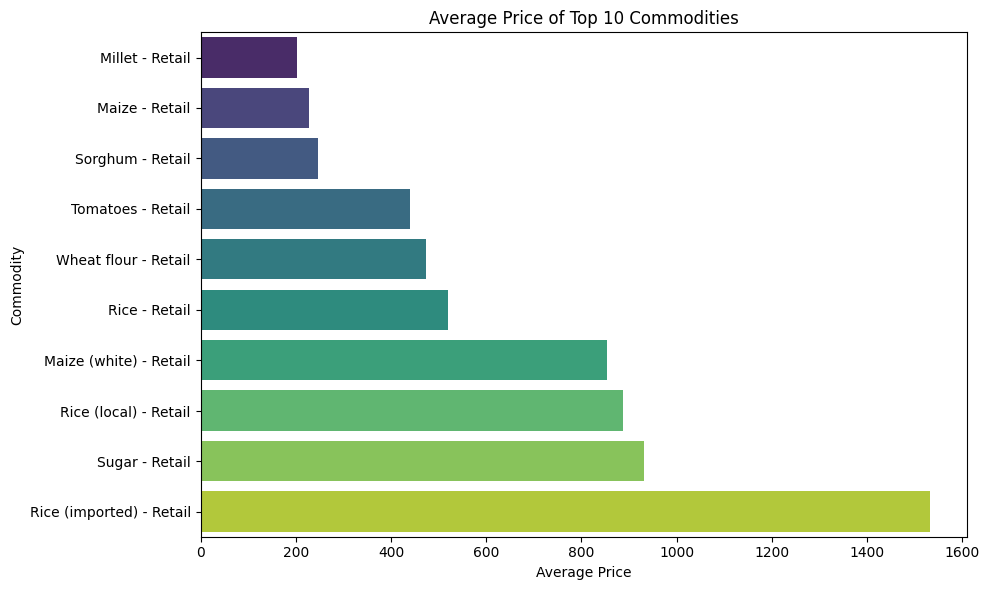

In [11]:
top_commodities = df['commodity'].value_counts().head(10).index
avg_prices = df[df['commodity'].isin(top_commodities)].groupby('commodity')['price'].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=avg_prices.values, y=avg_prices.index, palette="viridis")
plt.title('Average Price of Top 10 Commodities')
plt.xlabel('Average Price')
plt.ylabel('Commodity')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

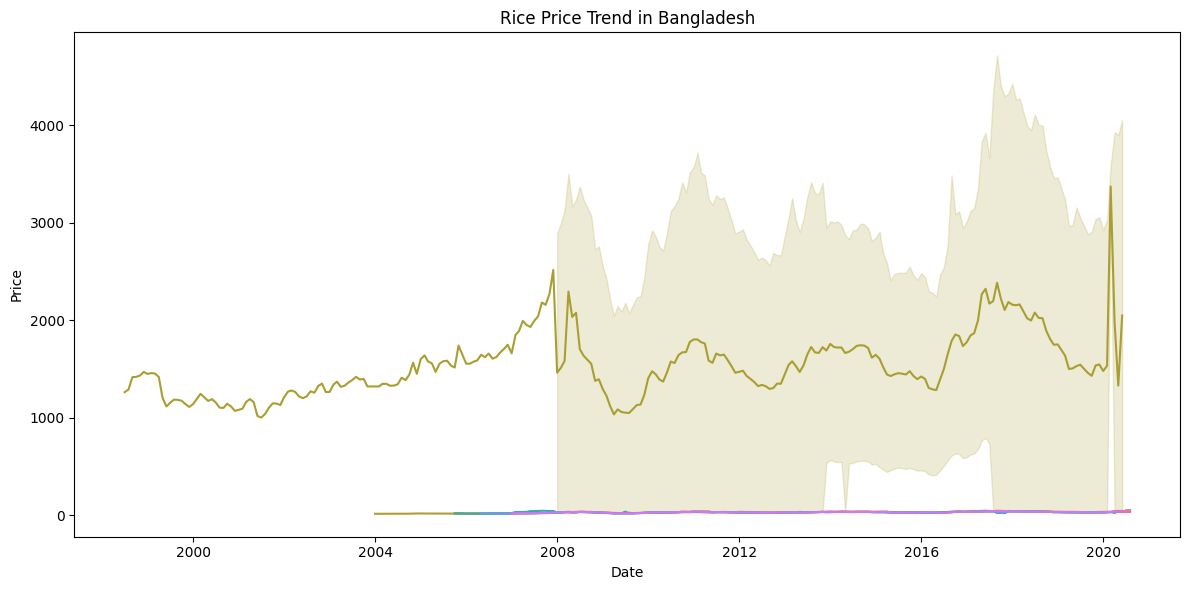

In [12]:
# Choose a specific country and commodity
rice_data = df[(df['commodity'].str.lower().str.contains('rice')) & (df['country'] == 'Bangladesh')]

plt.figure(figsize=(12,6))
sns.lineplot(data=rice_data, x='date', y='price', hue='market', legend=False)
plt.title('Rice Price Trend in Bangladesh')
plt.xlabel('Date')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Create a copy to avoid altering original df
clust_df = df[['country', 'commodity', 'price']].dropna()

# Encode categorical columns
le_country = LabelEncoder()
le_commodity = LabelEncoder()

clust_df['country_encoded'] = le_country.fit_transform(clust_df['country'])
clust_df['commodity_encoded'] = le_commodity.fit_transform(clust_df['commodity'])

# Prepare features
features = clust_df[['country_encoded', 'commodity_encoded', 'price']]

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


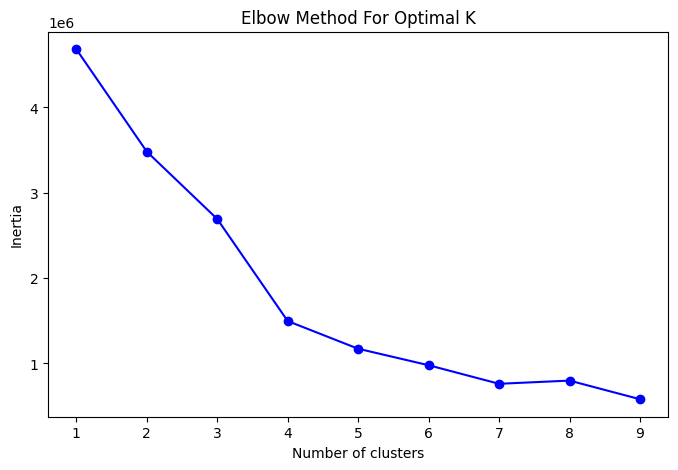

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()


In [15]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init='auto')
clust_df['cluster'] = kmeans.fit_predict(scaled_features)


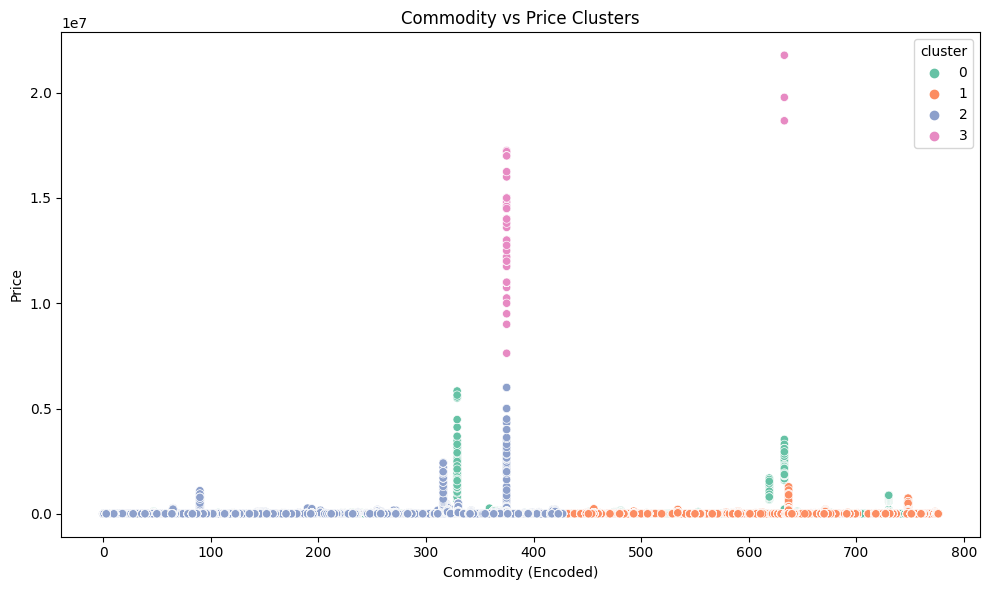

In [16]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=clust_df, 
    x='commodity_encoded', 
    y='price', 
    hue='cluster', 
    palette='Set2'
)
plt.title('Commodity vs Price Clusters')
plt.xlabel('Commodity (Encoded)')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


In [17]:
# Map back encoded values to actual names
clust_df['country'] = le_country.inverse_transform(clust_df['country_encoded'])
clust_df['commodity'] = le_commodity.inverse_transform(clust_df['commodity_encoded'])

# View cluster summary
cluster_summary = clust_df.groupby('cluster')[['price']].mean()
print(cluster_summary)

# Count of countries/commodities per cluster
print(clust_df.groupby('cluster')['country'].value_counts().head(10))


                price
cluster              
0        5.691725e+03
1        4.126506e+03
2        5.862460e+03
3        1.325146e+07
cluster  country                         
0        Bassas da India                     108279
         Burundi                              52400
         Democratic Republic of the Congo     36781
         Burkina Faso                         30948
         Gambia                               28049
         Benin                                19024
         Armenia                              16948
         Ethiopia                             16664
         Bolivia                              16268
         Colombia                             16176
Name: count, dtype: int64
